## Introduction to Machine Learning and Tensorflow

Welcome! This interactive machine learning and tensorflow tutorial is meant to combine existing tutorials to go through some basics of using this graphical library for the purposes of machine learning. 

The material for this tutorial comes largely from the google machine learning tutorial:

https://developers.google.com/machine-learning/crash-course/

For helpful tidbits about Jupyter notebooks themselves check out:

https://www.youtube.com/watch?v=HW29067qVWk

For helpful latex symbol references see:

 http://cs.brown.edu/about/system/managed/latex/doc/symbols.pdf
 https://www.sharelatex.com/learn/Subscripts_and_superscripts#Operators_using_subscripts_and_superscripts
 
 Authors:
 
 Tyler Barnes-Diana
 (As you update this please add your name :D )
 
 
 
 Note1: In order to maxmize the functionality of this document, it is recommended you open it as a jupyter notebook. As an HTML file you will not be able to manipulate code or use the internal hyperlinks. If you aren't sure how to use jupyter notebooks check out the youtube video about jupyter notebooks linked above

Note2: This tutorial, as of now, assumes some background programming knowledge... and unfortunately I don't have a link handy to a good tutorial about general programming. However I'll try to explain things the best I can in the comments in the programming blocks (those are the green bits that follow the "#" symbols in the code).

Note3: Allot of this material (python, machine learning, tensorflow) is new to me. If something is wrong, let me know!

Note4: This doesn't actually go into tensorflow yet. Sorry about that... it will soon!

## Table of Contents

#### What is Machine Learning

<a href='#Framework'>Framework</a> - missing supervised vs unsupervised section

#### Starting Simple - Linear Regression

<a href='#Models and Labels'>Models and Labels</a>

<a href='#Loss'>Loss</a>

<a href='#Reducing Loss'>Reducing Loss</a>




<a id='Framework'></a>

## What is Machine Learning?

### The framework 

We spend lots of time trying to come up with answers to a whole slew of questions, often coming up with a solution then seeing if we can find a better one. What if we could write a code that would do that for us? We can! And that's what machine learning boils down to. In this tutorial we will use tensorflow, as well as some other code libraries to create iterative codes that find good solutions to problems (including, hopefully, some hard ones). We'll talk about what makes a solution good and what makes a problem hard. 

There are different types of problems that can be tackled, often that require different methods and arise from differences in available data. Here, at least at first, we'll focus on something called "Supervised Machine Learning." This means for every data point I have (or example) I not only have the <b><i>features</i></b> associated with that <b><i>example</i></b>, but also a <b><i>label</i></b>. I will then build a <b><i>model</i></b> trained on several of these examples that, when trained, can take in a new feature set and give me a reasonable guess about what the label for that might be.




<b><i>Model</i></b> - defines relationship between feature & estimate of label

<b><i>Example</i></b> - instance of data, both features and labels

$$
(\vec{x}, y)
$$

<b><i>Feature</i></b> - a bit of data about the object, combined into a feature vector

$$
\vec{x} = x_1 + x_2 + ... + x_n
$$

<b><i>Label</i></b> - The true value for the informaiton about the object that one is going to model

$$
y
$$


Say I want to predict height, so I get a bunch of data from a big group of people. I record the height of both their parents, their weight, and whether or not they can dunk on a regulation height basketball hoop. These are all features that may be useful for my model. I also record their true height. That is the label in this case. Since we're predicting how tall they will be, which is predicting a continuous value, this is a <b><i>regression</i></b> problem. Machine learning can also be used to solve <b><i>classification</i></b> problems (for example are they taller or shorter than 6 feet).

<b><i>Regression</i></b> - predict continous values

<b><i>Classification</i></b> - predict category memborship

<a id='Models and Labels'></a>

## Starting simple - Linear Regression

### Using a model to generate labels

You might remember linear regression from stats. Linear regression is a way to estimate the value of a label from features. Each feature is multiplied by a corresponding weight (or slope term as described in many statistics textbooks). There is an additional term corresponding to a bias term (or an intercept term as it is often described in statistics. Our model thus will look something like the following:

$$
\hat{y} = \vec{w}•\vec{x}+b
$$

Say we have some data, namely a bunch of examples containing a single feature for each example and a corresponding label. Data such as the data below, where we want to estimate a measure of Income for a given area via median house value for that same area.

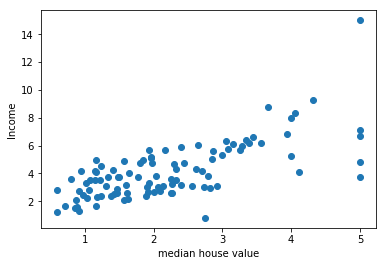

In [5]:
# If you are already famaliar with python and/or programming in general these comments might seem annoyingly exhaustive. 
# I'd reccomend trying to ignore everything that's green unless there is something in the code itslf you don't understand

# These blocks of code are written in a language called python. 

%matplotlib inline 
# This lets us plot figures right here in our jupyter notebooks.
# Bits of code that follow "%" symbols in these jupyter notebooks are called line magic (it's magical!).
# For more line magic check out the youtube video on jupyter notebooks linked in the intro.


# Lots of people have written lots of cool packages that allow people to do things beyond what the vanilla python does.
# Here we're importing other packages
import pandas as pd # pandas is a package with useful data manipulation
# You'll be able to identify functions from a particular library by the way the functions are called.
# A pandas function would normally be called by writing pandas.(insertfunctionnamehere) but...
# ...less work is better so when calling things from this package I want to be able to write "pd" instead of pandas
import matplotlib.pyplot as plt # pyplot is a fucnction inside a larger library called matplotlib that's really useful for graphing things.
# Note this isn't importing the entire matplotlib library... just a function from it
import numpy as np # numpy has functions that are useful for messing about with numbers

# First we'll read in some data from the internet
# Note the pd! This is a pandas function
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(  #We're going to randomly permute the data so that it's in a random order every time the code is rerun
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 100000.0 #This is a normalization factor to change the range of the data

x = california_housing_dataframe.median_house_value #we'll rename things for eas
y = california_housing_dataframe.median_income
#z = california_housing_dataframe.population

num_examples = 100 # we don't need the entire data set, this lets you set the number of examples you want to consider at a given time

# This plots a scatter plot of our (x,y) data points and labels the axis, then presents it to you
plt.scatter(x[0:(num_examples-1)], y[0:(num_examples-1)])
plt.xlabel('median house value')
plt.ylabel('Income')
plt.show()

We see here a scatter plot showing a bunch of examples. We could make a guess ourselves at what the intercept and slope value should be. Once we make a guess for each of those <b><i>parameters</i></b>, for any feature value we see our model offers a guess about what the label value should be. This is our model, in this case taking the form of a line. We can see our linear model in the scatter plot below. Feel free to change the $w_1$ and b values around in the code below to generate different models.

$$
\hat{y} = w_1•x_1+b
$$

<b><i>parameters</i></b> - the free variables in our model we change to make the model as accurate as possible... in this example case our $w_1$ and b terms

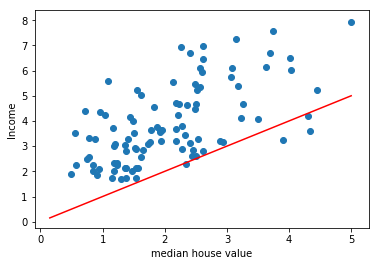

In [154]:
w_1 = 1
b = 0


regressX_0 = min(x)
regressX_1 = max(x)

regressY_0 = w_1*regressX_0 + b
regressY_1 = w_1*regressX_1 + b

plt.plot([regressX_0, regressX_1], [regressY_0, regressY_1], c='r')
plt.scatter(x[0:(num_examples-1)], y[0:(num_examples-1)])
plt.xlabel('median house value') #confused about the units here, I basically normalized em beteen 1 and 10 but I don't know what they were originally
plt.ylabel('Income')
plt.show()

<a id='Loss'></a>

### Loss - Measuring how good our guesses are

Our label guesses ($\hat{y}$) now fall on that line. With a given x value, or feature, we can make a guess about our label value. A new question arises... how good are our guesses? In order to measure this we need to compare our estimated label value ($\hat{y}$) with the true label value (y). Functions that make this comparison are called <b><i>loss</i></b> functions in machine learning.

<b><i>Loss</i></b> - A comparison between a label value predicted by a model and the true label value

You may recall from statistics that when preforming a linear regression we would try to minimize something called the Mean Square Error

$$
MSE = \frac {\sum_{(\vec{x},y)\in D} (y-\hat{y}(x))^2} {N}
$$

N = the number of data points 

D = the set of data points

This is a way of measuring how far the predicted label value $(\hat{y})$ for each feature set $(\vec{x})$ differs from the true label (y). This is a type of loss measurement! In Machine Learning we'll use a similar measurement of loss called L2 loss, which is the same aside from the division by the number of data points.

$$
L2 Loss = \sum_{(x,y)\in D} (y-\hat{y}(\vec{x}))^2
$$

Below you can manipulate the weight and bias values again, and see how this L2 loss changes as you do so. Since loss represents the difference between a true label value and the estimated one, the smaller that loss the more accurate the model.

Later we'll talk about different measurements of loss, which ones are good for which situatios, and more. 



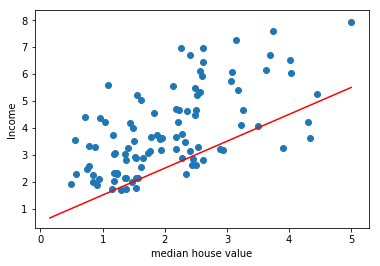

L2Loss = [ 254.6398509]


In [158]:
w_1 = 1 ; b = 0.5

regressX_0 = min(x); regressX_1 = max(x)
regressY_0 = w_1*regressX_0 + b; regressY_1 = w_1*regressX_1 + b

plt.plot([regressX_0, regressX_1], [regressY_0, regressY_1], c='r')
plt.scatter(x[0:(num_examples-1)], y[0:(num_examples-1)])
plt.xlabel('median house value'); plt.ylabel('Income')
plt.show()

y_est = np.zeros([num_examples,1]); L2Loss = 0

for i in range(0,(num_examples)):

    y_est[i] = w_1*x[i] + b
    L2Loss = L2Loss + ((y[i])-(y_est[i]))**2

print("L2Loss = %s" %L2Loss)

<a id='Reducing Loss'></a>

### Reducing Loss

So now we have a way to measure loss, and we know we want to make loss as small as possible... but lets not forget the realm we're operating in here! We are in the world of machine learning.